### Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

### Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

### Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.
and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

## Importing the Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sms

In [2]:
data_set = pd.read_csv("D:\\ML Python\\MY_DATA\\Regression\\housing_price_california.csv")
data_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Various information about the Dataset

In [3]:
data_set.shape

(20640, 10)

In [4]:
print("Data set Information: ")
data_set.info()
print("\n")
print("Number of null values in the Data set: (Column Wise)")
data_set.isnull().sum()

Data set Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Number of null values in the Data set: (Column Wise)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data_set.describe(include = "all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
data_set['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Dummy Variables

In [7]:
op = pd.get_dummies(data_set['ocean_proximity'], drop_first = True)
## data_set = data_set[["INLAND","ISLAND","NEAR BAY","NEAR OCEAN","longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]
op.head(5)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [8]:
data_set = pd.concat([op, data_set], axis = 1)
data_set.dropna(inplace = True)
data_set

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,0,1,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,0,0,1,0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,0,0,1,0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,0,0,1,0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,0,0,1,0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1,0,0,0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,1,0,0,0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,1,0,0,0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,1,0,0,0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis

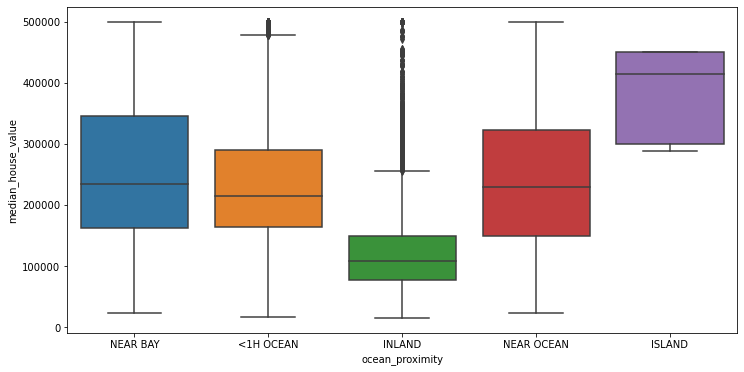

In [9]:
plt.figure(figsize = (12,6))
sms.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = data_set)
plt.show()

Those houses which are in island areas are all costly compared to other houses, Some houses are very costly which are inland areas also.

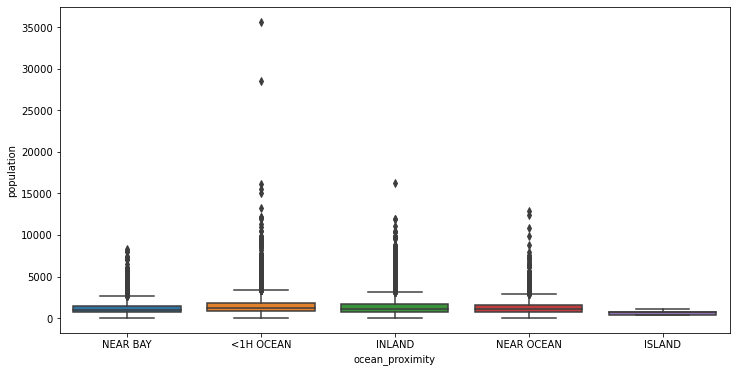

In [10]:
plt.figure(figsize = (12,6))
sms.boxplot(x = 'ocean_proximity', y = 'population', data = data_set)
plt.show()

Maximum population stays at less than 1h ocean than inland area then near ocean and after that near bay and at last island areas

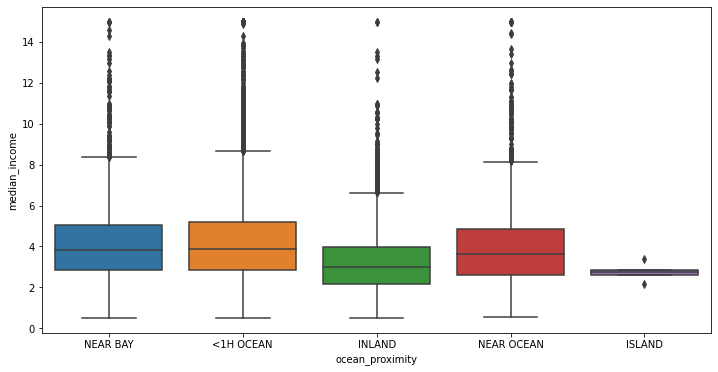

In [11]:
plt.figure(figsize = (12,6))
sms.boxplot(x = 'ocean_proximity', y = 'median_income', data = data_set)
plt.show()

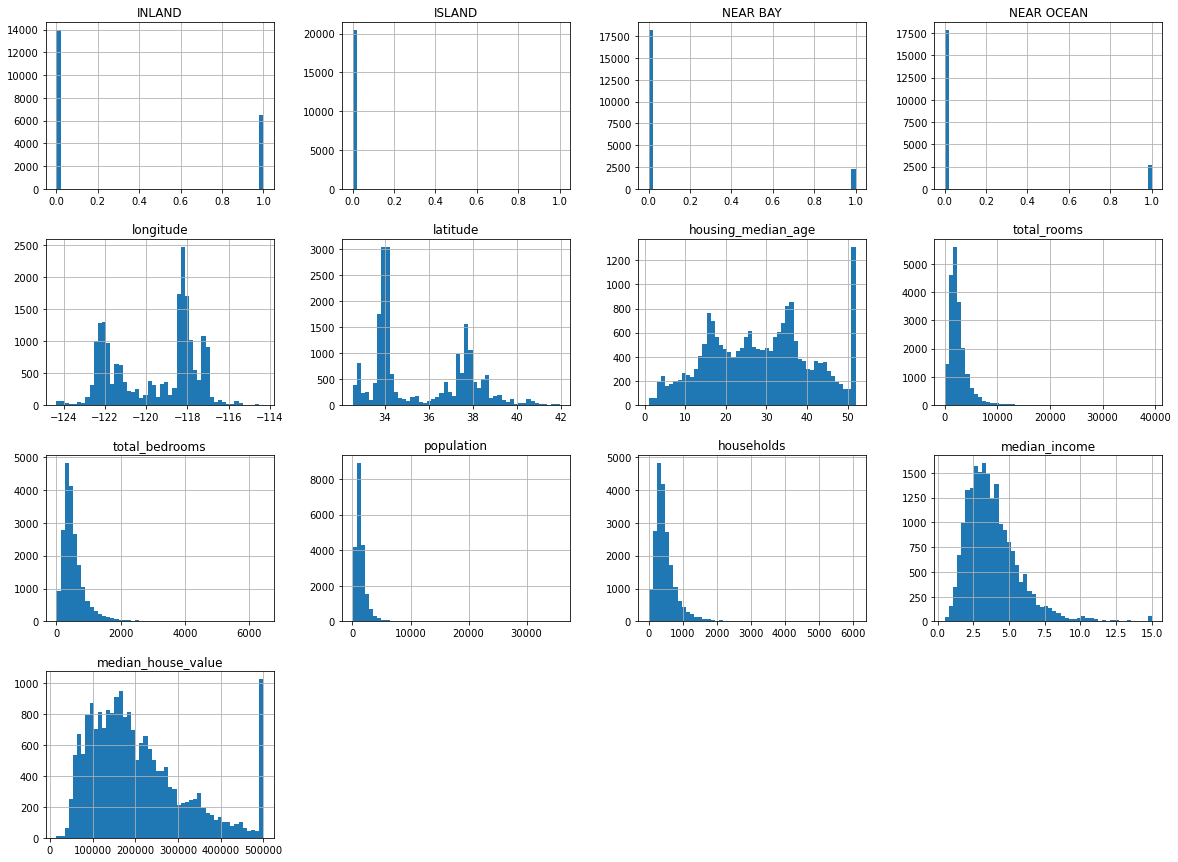

In [12]:
data_set.hist(bins = 50, figsize = (20, 15))
plt.show()

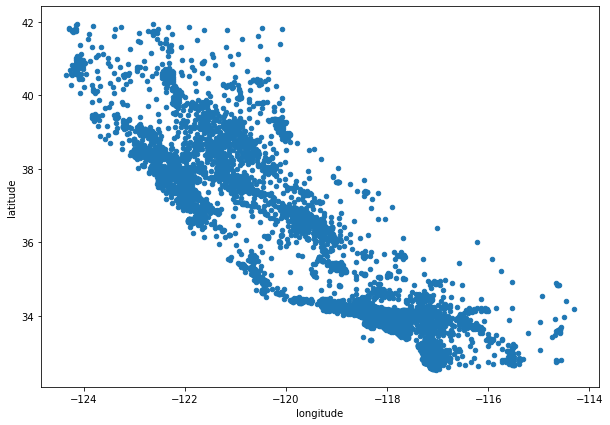

In [13]:
data_set.plot(kind = "scatter", x = "longitude", y = "latitude", figsize = (10, 7))
plt.show()

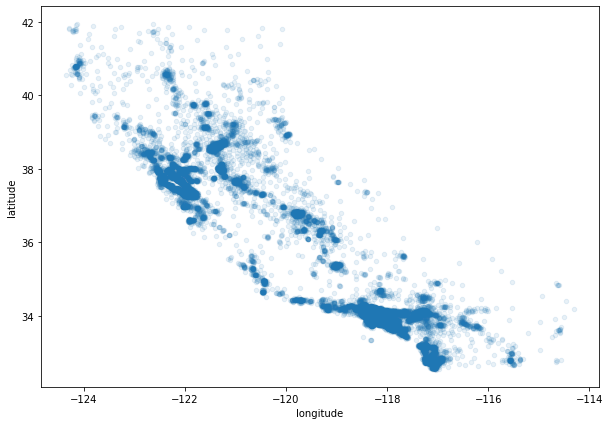

In [14]:
data_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize = (10, 7))
plt.show()

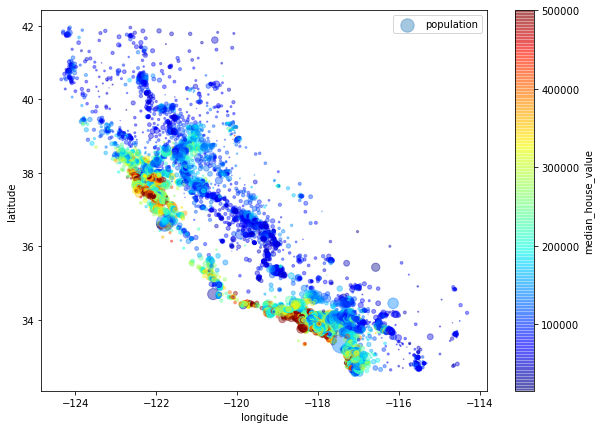

In [15]:
data_set.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4,
    s = data_set["population"]/100, label = "population", figsize = (10,7),
    c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar = True,
    sharex = False)
plt.legend()

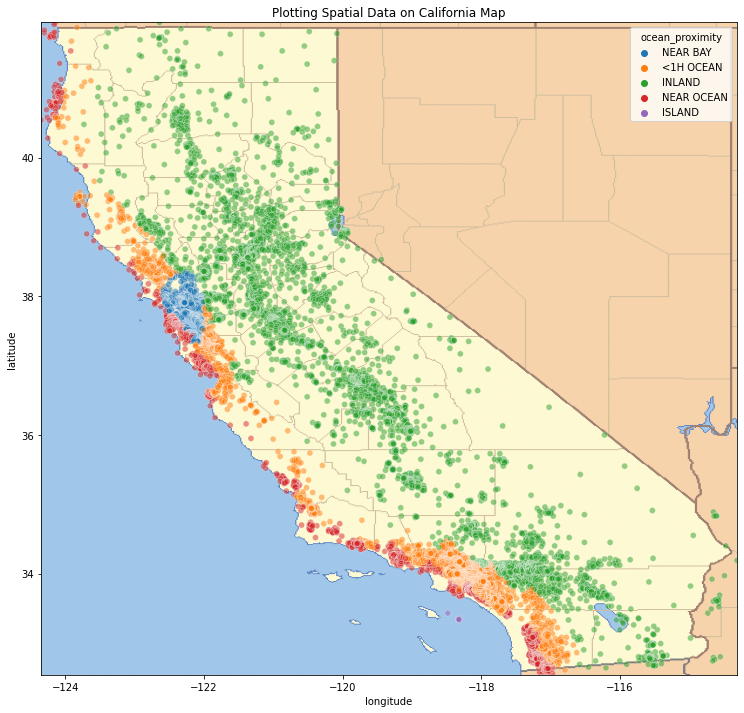

In [16]:
# Setting the Longitude and Latitude
BBox = ((data_set.longitude.min(),   data_set.longitude.max(),      
         data_set.latitude.min(), data_set.latitude.max()))
# Reading the Map
mymap = plt.imread('D:\california.png')
plt.figure(figsize = (15,12))
# Plotting the data points using seaborn
a = sms.scatterplot(x = 'longitude', y= 'latitude', data = data_set, hue = 'ocean_proximity', alpha = 0.5)
a.set_title("Plotting Spatial Data on California Map")
# Setting the x limit and y limit
a.set_xlim(BBox[0],BBox[1])
a.set_ylim(BBox[2],BBox[3])
# Plotting the points on the map
a.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

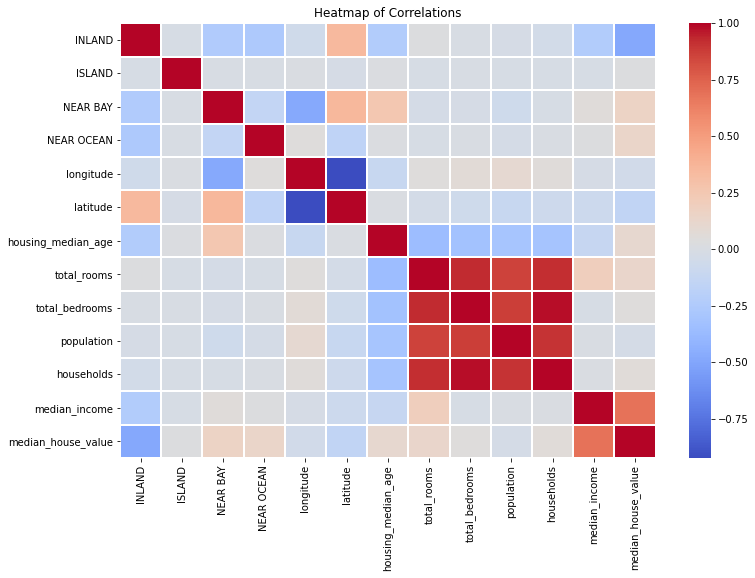

In [17]:
plt.figure(figsize = (12, 8))
data_set_cor = data_set.corr()
axes = sms.heatmap(data_set_cor, linecolor = 'white', linewidths = 1, cmap = 'coolwarm')
axes.set_title("Heatmap of Correlations")
plt.show()

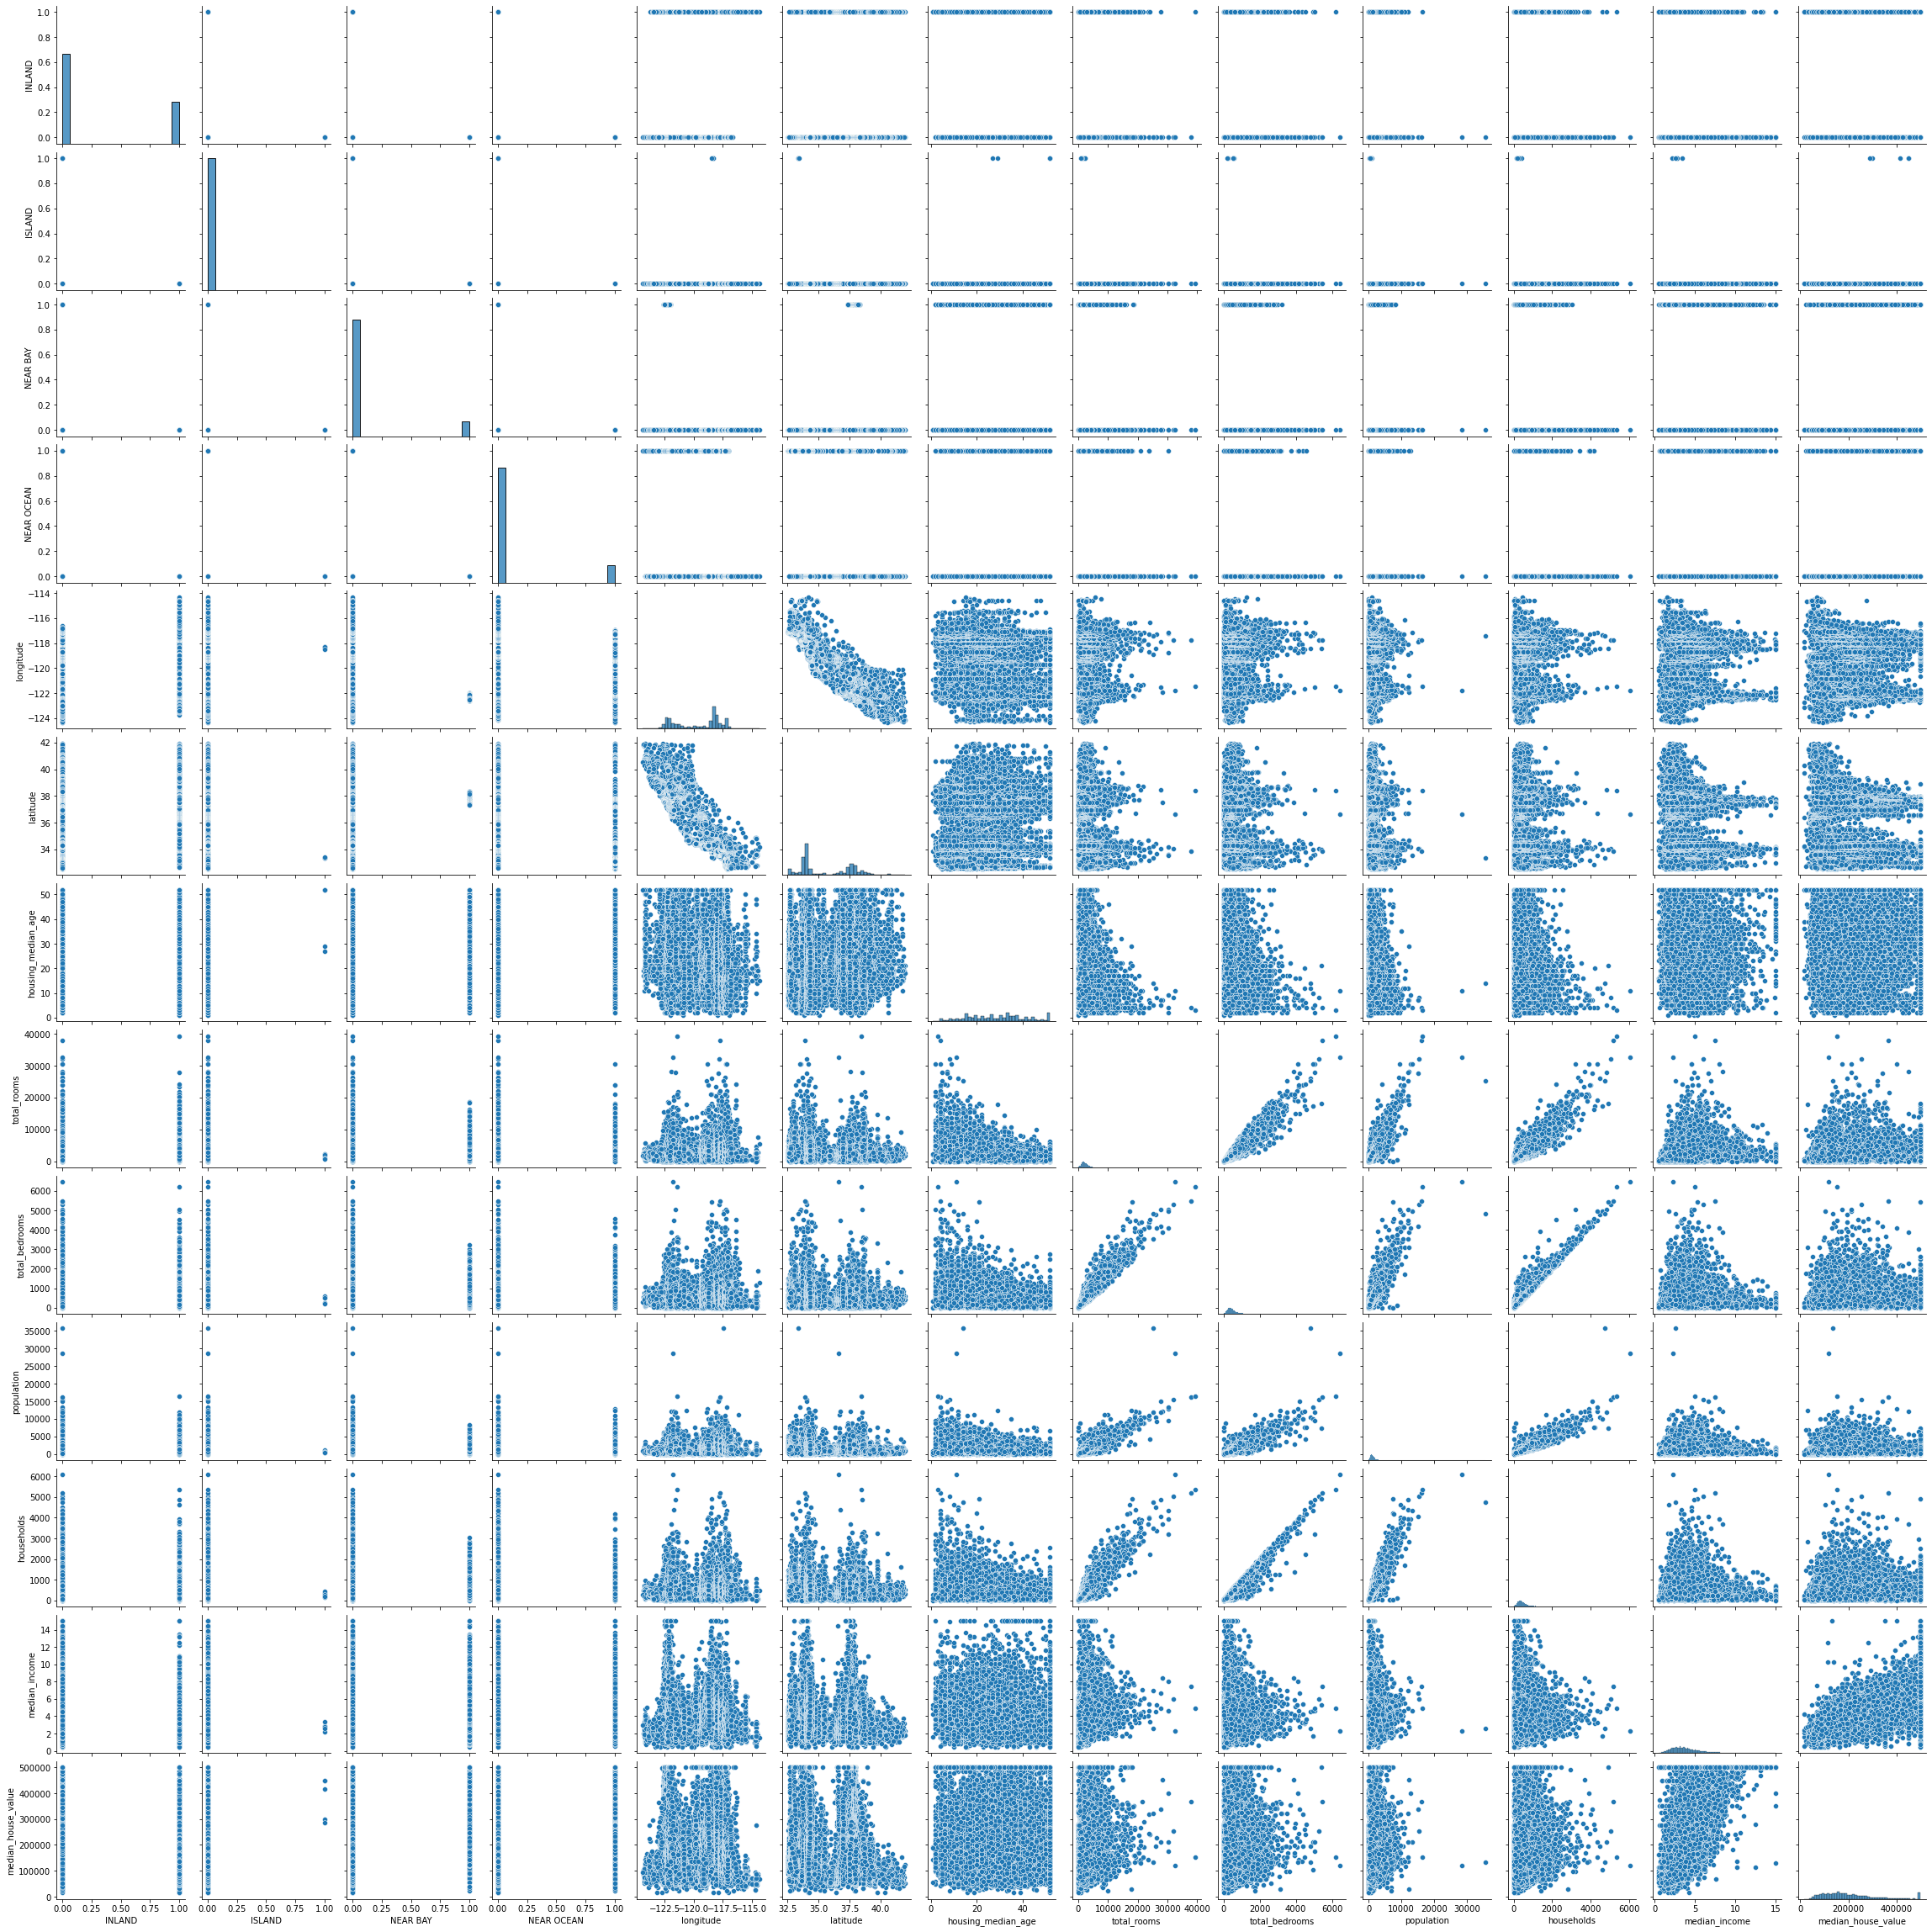

<Figure size 720x864 with 0 Axes>

In [18]:
sms.pairplot(data_set)
plt.figure(figsize = (10,12))
plt.show()

Total Bedrooms and Household , Total Rooms and Total bedrooms are having a linear relationhip.

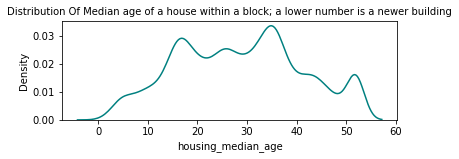

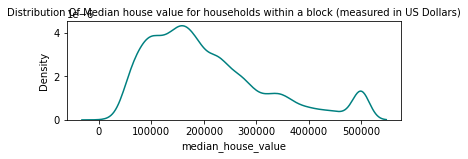

In [19]:
plt.subplot(2, 1, 1)
plt.title('Distribution Of Median age of a house within a block; a lower number is a newer building', fontsize = 10)
sms.kdeplot(data_set['housing_median_age'], color = 'teal')
plt.show()
plt.subplot(2, 1, 2)
plt.title('Distribution Of Median house value for households within a block (measured in US Dollars)', fontsize = 10)
sms.kdeplot(data_set['median_house_value'],color = 'teal')
plt.show()

In [20]:
data_set = data_set.drop("ocean_proximity", axis = 1)
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 12].values

## Regression Model

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

#Predicting a new result with Linear Regression
result_linear = lin_reg.predict(X_test)

#Predicting a new result with Polynomial Regression
result_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))

## Model Performance

In [22]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, result_linear)

In [23]:
print("The R^2 score of Linear Regression is: {}%".format(score1 * 100))

The R^2 score of Linear Regression is: 64.31165388576352%


In [24]:
from sklearn.metrics import r2_score
score2 = r2_score(y_test, result_poly)

In [25]:
print("The R^2 score of Linear Regression is: {}%".format(score2 * 100))

The R^2 score of Linear Regression is: 73.22238839832823%
